# ------------------- Préambule -------------------

In [ ]:
import os, pandas as pd
from sqlalchemy import create_engine

PGURL  = os.getenv("SUPABASE_DB_URL")
engine = create_engine(PGURL)

# jointure listings ↔ neighbourhoods
sql = """
SELECT l.id,
       l.price,
       l.room_type,
       COALESCE(l.neighbourhood, 'Unknown') AS neighbourhood
FROM listings AS l
"""
df = pd.read_sql(sql, engine)
print(f"{df.neighbourhood.nunique()} quartiers (incl. Unknown)")

34 quartiers (incl. Unknown)


# ------------------- Médiane des prix par quartier -------------------

In [3]:
price_neigh = (df.groupby("neighbourhood")["price"]
                 .median()
                 .sort_values(ascending=False)
                 .to_frame("median_price"))
price_neigh.head()

,median_price
neighbourhood,
L'Île-Bizard-Sainte-Geneviève,250.0
Pointe-Claire,132.0
Kirkland,125.5
Pierrefonds-Roxboro,125.0
Dorval,124.0


# ------------------- Top & bottom 10 quartiers -------------------

<Figure size 700x400 with 0 Axes>

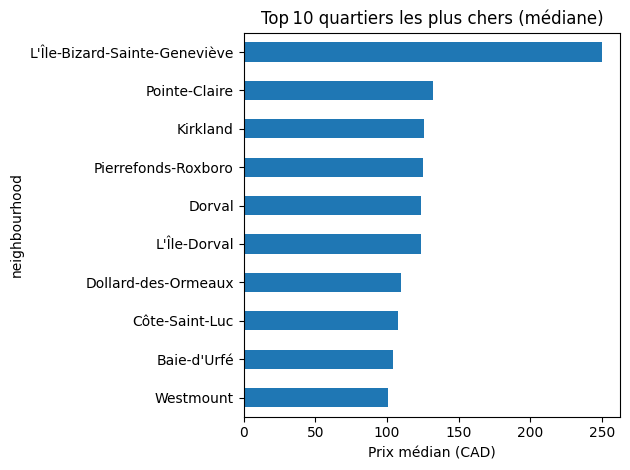

<Figure size 700x400 with 0 Axes>

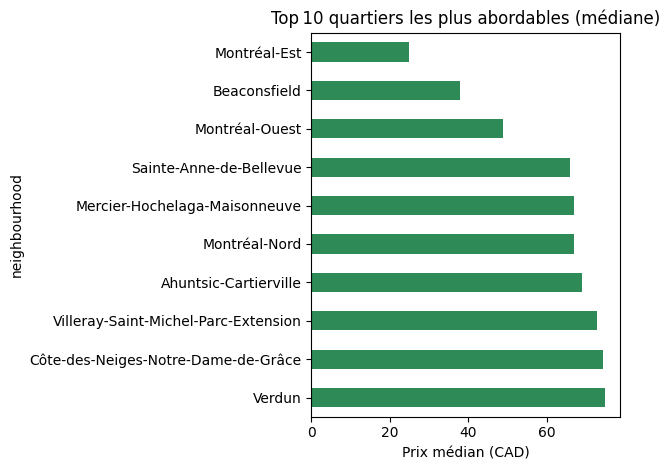

In [ ]:
top10    = price_neigh.head(10)
bottom10 = price_neigh.tail(10)

import matplotlib.pyplot as plt

# Top 10
plt.figure(figsize=(7,4))
top10[::-1].plot(kind="barh", legend=False)
plt.title("Top 10 quartiers les plus chers (médiane)")
plt.xlabel("Prix médian (CAD)")
plt.tight_layout()
plt.show()

# Bottom 10
plt.figure(figsize=(7,4))
bottom10.plot(kind="barh", legend=False, color="seagreen")
plt.title("Top 10 quartiers les plus abordables (médiane)")
plt.xlabel("Prix médian (CAD)")
plt.tight_layout()
plt.show()

# ------------------- Préparer la table pour la carte -------------------

In [ ]:
# Export CSV pour Nuxt / GeoJSON
price_neigh.reset_index().to_csv("outputs/median_price_by_neigh.csv", index=False)

# ------------------- Observations Markdown -------------------

In [9]:
from IPython.display import Markdown

# Assumons que top10, bottom10 et price_neigh existent déjà
quartier_cher   = top10.index[0]
prix_cher       = int(top10.iloc[0, 0])

quartier_pascher = bottom10.index[-1]
prix_pascher     = int(bottom10.iloc[-1, 0])

ecart_mediane = prix_cher - prix_pascher
p90 = price_neigh["median_price"].quantile(0.9)
p10 = price_neigh["median_price"].quantile(0.1)
ecart_p90_p10 = int(p90 - p10)

Markdown(f"""
### Observations - Prix par quartier

- **Quartier le plus cher** : *{quartier_cher}* (médiane ≈ {prix_cher}$).  
- **Quartier le plus abordable** : *{quartier_pascher}* (médiane ≈ {prix_pascher}$).  
- **Écart médian (quartier le plus cher - le plus abordable)** : {ecart_mediane}$.  
- **Écart inter-quartiers P90 - P10** : {ecart_p90_p10}$.  
- Les quartiers centraux (*Plateau-Mont-Royal*, *Ville-Marie*) dominent généralement le haut du classement, tandis que certains secteurs périphériques restent plus abordables.
""")


### Observations - Prix par quartier

- **Quartier le plus cher** : *L'Île-Bizard-Sainte-Geneviève* (médiane ≈ 250$).  
- **Quartier le plus abordable** : *Montréal-Est* (médiane ≈ 25$).  
- **Écart médian (quartier le plus cher - le plus abordable)** : 225$.  
- **Écart inter-quartiers P90 - P10** : 58$.  
- Les quartiers centraux (*Plateau-Mont-Royal*, *Ville-Marie*) dominent généralement le haut du classement, tandis que certains secteurs périphériques restent plus abordables.
